# Logistic Regression Classification
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## Setup

### Environment

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import datasets

### Load the dataset iris

In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame({'Sepal length': iris.data[:,0],
                   'Sepal width': iris.data[:,1],
                   'Petal length':iris.data[:,2],
                   'Petal width':iris.data[:,3],
                   'Species':iris.target})
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### A simple visualization

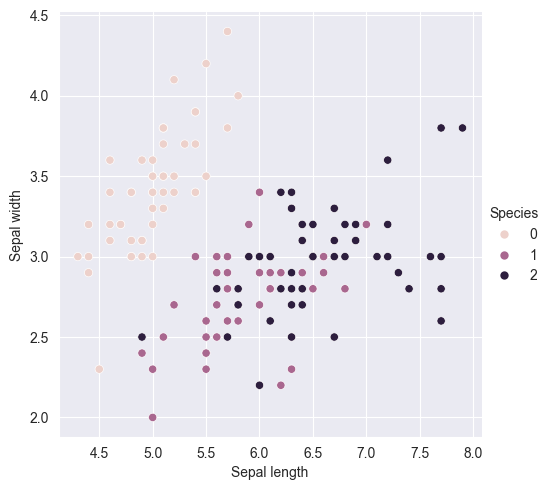

In [5]:
sns.relplot(data = df, x = 'Sepal length', y = 'Sepal width', hue = 'Species')

### Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split

X = df[df.columns[:4]]
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [7]:
X_train[:5]

,Sepal length,Sepal width,Petal length,Petal width
104,6.5,3.0,5.8,2.2
94,5.6,2.7,4.2,1.3
87,6.3,2.3,4.4,1.3
19,5.1,3.8,1.5,0.3
68,6.2,2.2,4.5,1.5


## Train the model

In [8]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=200).fit(X, y)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Confusion Matrix:
[[12  0  0]
 [ 0 11  0]
 [ 0  1  6]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      1.00      0.96        11
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667
